In [74]:
import random
import time
import json
%run Cube.ipynb

Support algs imported!
Cube initiated


In [ ]:
'''
Idea:
Gen table lookup for 12 (start with 10?) moves

Solver: brute force algs of increasing length, check table lookup every time

'''

In [310]:
@njit
def _is_valid_2gen(length,ids):
    for i in range(length-1):
        if ids[i]//3==ids[i+1]//3:
            return False
    return True 

@njit
def _inc_2gen(ids,nr_moves):
    for i in range(len(ids)):
        ids[i]+=1
        ids[i]%=nr_moves
        if ids[i]:
            break
    return ids

@njit
def _increment_2gen(ids,nr_moves,length):
    ids = _inc_2gen(ids,nr_moves)
    while not _is_valid_2gen(length,ids):
        ids = _inc_2gen(ids,nr_moves)
    return ids  

In [314]:
class alg_index_2gen:
    def __init__(self, length, moves = ["R","R'","R2","U","U'","U2"]):
        '''
        length: int
        '''
        self.length = length
        self.moves = moves
        self.ids = np.array(([0,3]*int(length/2+1))[:length])
        
    def is_valid(self):
        return _is_valid_2gen(self.length,self.ids) 
        
    def inc(self):
        self.ids = _inc_2gen(ids,len(self.moves))
    
    def increment(self):
        _increment_2gen(self.ids,len(self.moves),self.length)

    def get_alg(self):
        scr = self.moves[self.ids[0]]
        for i in range(1,len(self.ids)):
            scr += f" {self.moves[self.ids[i]]}"
        return scr

tst = alg_index_2gen(10)
t = time.time()
for i in range(10000):
    tst.increment()
time.time()-t

0.024547100067138672

In [69]:
def cube_state_2gen(cube):
    ids = [0,1,2,5,8,47,50,53,24,21,18,19,20,27,28,29,9,10,11,12,16,17,37,39]
    str_repr = ""
    for i in ids:
        str_repr += str(cube.state[i])
    return str_repr

In [294]:
# # make table
# table2gen = {}
# ''' id: alg '''

# t = time.time()
# N = 13
# for n in range(1, N+1):
#     alg = alg_index_2gen(n)
#     start_alg = alg.get_alg()
    
#     cube = Cube()
#     cube.apply_moves(alg.get_alg())
#     state = cube_state_2gen(cube)
#     if state not in table2gen.keys():
#         table2gen[state] = inverse_alg(alg.get_alg())
#     alg.increment()
    
#     while alg.get_alg() != start_alg:
#         cube = Cube()
#         cube.apply_moves(alg.get_alg())
#         state = cube_state_2gen(cube)
#         if state not in table2gen.keys():
#             table2gen[state] = inverse_alg(alg.get_alg())
#         alg.increment()
#     print(f"Algs of length {n} genned in {time.time()-t}")

Algs of length 13 genned in 23628.291438102722


In [295]:
# len(table2gen)

2889650

In [305]:
# import json
# with open("_.json", "w") as outfile:
#     json.dump(table2gen, outfile, indent=4)

with open("2gen_13_moves.json", "r") as outfile:
    table2gen = json.load(outfile)

In [ ]:
moveset = ["R","R'","R2","U","U'","U2"]

In [363]:
def lookup_2gen(cube):
    '''
    assumes table2gen exist with lookup of some number of moves
    '''
    state = cube_state_2gen(cube)
    if state in table2gen.keys():
        return table2gen[state]
    return False

def solver_2gen(cube):
    lookup = lookup_2gen(cube)
    if lookup:
        cube.apply_moves(lookup)
        return lookup
    n = 1
    while True:
        alg_i = alg_index_2gen(n)
        
        for i in range(6*3**n):
            alg = alg_i.get_alg()
            cube.apply_moves(alg)
            
            lookup = lookup_2gen(cube) 
            if lookup:
                cube.apply_moves(lookup)
                return alg + " " + lookup
            inv = inverse_alg(alg)
            cube.apply_moves(inv)
            alg_i.increment()
        n+=1

# cube = Cube()
# cube.apply_moves("R U R'")

# scrambles = []
# solutions = []
# lengths = []
# t = time.time()

# N = 1000
# for i in range(N):
#     # scramble
#     cube = Cube()
#     scr = ""
#     for k in range(200):
#         scr += random.choice(moveset)+" "
#     scr = scr.strip(" ")
#     scr = cancel_alg(scr)
#     scrambles.append(scr)
#     cube.apply_moves(scr)

#     sol = solver_2gen(cube)
#     solutions.append(sol)
#     lengths.append(count_moves(sol))
    
# #     print(f"{i+1} done, {lengths[-1]} moves. Time since start: {time.time()-t}")

# print(sum(lengths)/N)

15.831


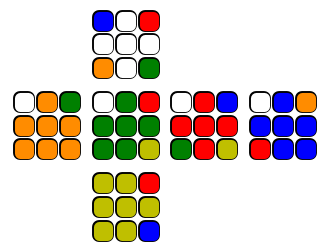

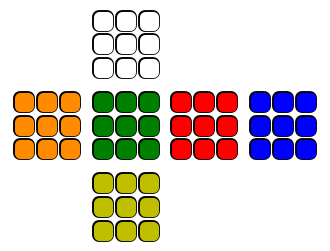

R2 U2 R U R U R U2 R2 U2 R2 U2 R' U R U R' U2 R2 U2 20 0.15202546119689941


In [323]:
# cube = Cube()
# cube.apply_moves("B R2 U R' U R U2 R U2 R U R' U R2 U R' U B' R2 L B R2 U R' U R U2 R U2 R U R' U R2 U R' U B' L' R2") #R U2 R' U' R U R' U' R U' R2 U R' U' R' U' R' U R U R2
# cube.plot()

# t = time.time()
# sol = solver_2gen(cube)
# t = time.time()-t
# cube.plot()
# print(sol,count_moves(sol),t)

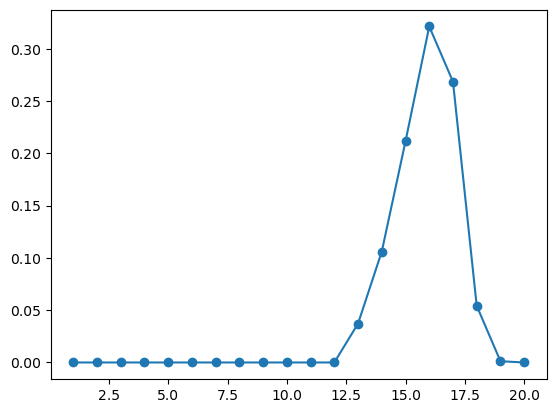

In [324]:
# lengths_distribution = []
# for i in range(1,21):
#     lengths_distribution.append(lengths.count(i))
    
# plt.scatter(range(1,21),np.array(lengths_distribution)/N)
# plt.plot(range(1,21),np.array(lengths_distribution)/N)
# plt.show()

In [356]:
def partly_solved(cube,ids):
    '''
    checks if the "stickers" at the ids are solved
    '''
    state = cube.state
    ref_state = Cube().state
    for i in ids:
        if state[i] != ref_state[i]:
            return False
    return True

# cube = Cube(1)
# print(cube)
# cube = Cube()

In [359]:
def test_2gen(ids):
    cube = Cube()
    states = []
    scr = ""
    for k in range(100):
        scr += random.choice(moveset)+" "
    scr = scr.strip(" ")
    scr = cancel_alg(scr)
    cube.apply_moves(scr)

    while len(states)<1000:
        cube.apply_moves(random.choice(moveset))
        if partly_solved(cube, ids):
            states.append(cube.state.copy())

    solutions = []
    lengths = []
    for state in states:
        cube.state = state
        sol = solver_2gen(cube)
        solutions.append(sol)
        lengths.append(count_moves(sol))    
    print(sum(lengths)/len(lengths), max(lengths))

    lengths_distribution = []
    for i in range(1,21):
        lengths_distribution.append(lengths.count(i))
    print(lengths_distribution)
    plt.scatter(range(1,21),np.array(lengths_distribution)/len(lengths))
    plt.plot(range(1,21),np.array(lengths_distribution)/len(lengths))
    plt.show()

ids = []
# test_2gen(ids)

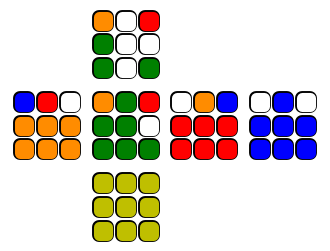

In [345]:
# cube = Cube()
# cube.state = states[-1]
# cube.plot()